In [225]:
import pandas as pd
import numpy as np
import datetime as dt

from sklearn.linear_model import LinearRegression
from sklearn import preprocessing, svm
from sklearn.model_selection import cross_validate, train_test_split

import matplotlib.pyplot as plt
from matplotlib import style
import pandas_datareader.data as web

In [226]:
style.use('ggplot')

start = dt.datetime(2009, 5, 1)
end = dt.datetime.now()

In [227]:
df = web.DataReader("AMZN", 'yahoo', start, end)

In [228]:
print(df.tail())

                   High          Low         Open        Close   Volume  \
Date                                                                      
2019-05-06  1959.000000  1910.500000  1917.979980  1950.550049  5417800   
2019-05-07  1949.099976  1903.380005  1939.989990  1921.000000  5902100   
2019-05-08  1935.369995  1910.000000  1918.869995  1917.770020  4078600   
2019-05-09  1909.400024  1876.000000  1900.000000  1899.869995  5308300   
2019-05-10  1903.790039  1856.000000  1898.000000  1889.979980  5712700   

              Adj Close  
Date                     
2019-05-06  1950.550049  
2019-05-07  1921.000000  
2019-05-08  1917.770020  
2019-05-09  1899.869995  
2019-05-10  1889.979980  


In [229]:
df = df[['Adj Close']]

In [230]:
forecast_out = int(30) # predicting 30 days into future
df['Prediction'] = df[['Adj Close']].shift(-forecast_out) #  label column with data shifted 30 units up

In [231]:
X = np.array(df.drop(['Prediction'], 1))
X = preprocessing.scale(X)

In [232]:
X_forecast = X[-forecast_out:] # set X_forecast equal to last 30
X = X[:-forecast_out] # remove last 30 from X

In [233]:
y = np.array(df['Prediction'])
y = y[:-forecast_out]

In [234]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [235]:
# Training
clf = LinearRegression()
clf.fit(X_train,y_train)
# Testing
confidence = clf.score(X_test, y_test)
print("confidence: ", confidence)

confidence:  0.9768260429860359


In [236]:
forecast_prediction = clf.predict(X_forecast)
print(forecast_prediction)

[1842.10457158 1876.58208626 1876.36561066 1883.29408837 1881.39703215
 1900.38861254 1913.35889901 1898.90386683 1910.75036806 1907.38920683
 1906.34798438 1908.21407954 1926.94790294 1928.78303706 1925.55591451
 1951.97097174 1989.562211   1966.85895512 1967.3744691  2017.25560699
 2004.67711618 1992.3975379  1976.93211846 1965.90004374 2029.45262248
 2017.17317006 1986.70624341 1983.37604323 1964.92061751 1954.72373586]


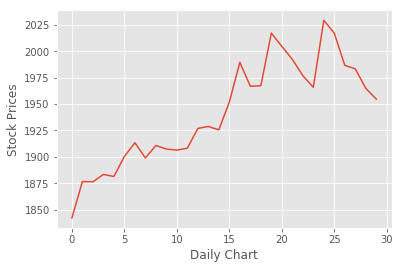

In [237]:
plt.plot(forecast_prediction)
plt.xlabel('Daily Chart')
plt.ylabel('Stock Prices')
plt.show()